<a href="https://colab.research.google.com/github/lynnlyn620/nyu-python-public-policy/blob/master/Homework_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NYU Wagner - Python Coding for Public Policy**
# Starter notebook for HW 7: Final Assignment

## **Data Sources**

311 Complaints Data
- File path on google drive: '/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv'

In [0]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt 
import numpy as np
import statsmodels.api as sm

In [0]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [0]:
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
df = pd.read_csv('/content/drive/My Drive/Data for Python/cleaned_311_data_revised.csv', header='infer')

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10,19,20,22,33,36,37,38,39) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Community District Profiles
- [Data Dictionary](https://communityprofiles.planning.nyc.gov/data/cd_profile_data_dictionary.csv)
- [Indicators data](https://planninglabs.carto.com/api/v2/sql?format=csv&q=SELECT%20cartodb_id,the_geom,the_geom_webmercator,acres,acs_tooltip,acs_tooltip_2,acs_tooltip_3,area_sqmi,borocd,cb_email,cb_website,cd_full_title,cd_short_title,cd_son_fy2018,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,crime_count_boro,crime_count_nyc,crime_per_1000,crime_per_1000_boro,crime_per_1000_nyc,female_10_14,female_15_19,female_20_24,female_25_29,female_30_34,female_35_39,female_40_44,female_45_49,female_5_9,female_50_54,female_55_59,female_60_64,female_65_69,female_70_74,female_75_79,female_80_84,female_85_over,female_under_5,fp_100_area,fp_100_bldg,fp_100_cost_burden,fp_100_cost_burden_value,fp_100_mhhi,fp_100_mortg_value,fp_100_openspace,fp_100_ownerocc,fp_100_ownerocc_value,fp_100_permortg,fp_100_pop,fp_100_rent_burden,fp_100_rent_burden_value,fp_100_resunits,fp_500_area,fp_500_bldg,fp_500_cost_burden,fp_500_cost_burden_value,fp_500_mhhi,fp_500_mortg_value,fp_500_openspace,fp_500_ownerocc,fp_500_ownerocc_value,fp_500_permortg,fp_500_pop,fp_500_rent_burden,fp_500_rent_burden_value,fp_500_resunits,lep_rate,lep_rate_boro,lep_rate_nyc,lot_area_commercial_office,lot_area_industrial_manufacturing,lot_area_mixed_use,lot_area_open_space,lot_area_other_no_data,lot_area_parking,lot_area_public_facility_institution,lot_area_res_1_2_family_bldg,lot_area_res_multifamily_elevator,lot_area_res_multifamily_walkup,lot_area_transportation_utility,lot_area_vacant,lots_commercial_office,lots_industrial_manufacturing,lots_mixed_use,lots_open_space,lots_other_no_data,lots_parking,lots_public_facility_institution,lots_res_1_2_family_bldg,lots_res_multifamily_elevator,lots_res_multifamily_walkup,lots_total,lots_transportation_utility,lots_vacant,male_10_14,male_15_19,male_20_24,male_25_29,male_30_34,male_35_39,male_40_44,male_45_49,male_5_9,male_50_54,male_55_59,male_60_64,male_65_69,male_70_74,male_75_79,male_80_84,male_85_over,male_under_5,mean_commute,mean_commute_boro,mean_commute_nyc,moe_bach_deg,moe_bach_deg_boro,moe_bach_deg_nyc,moe_foreign_born,moe_hh_rent_burd,moe_hh_rent_burd_boro,moe_hh_rent_burd_nyc,moe_lep_rate,moe_lep_rate_boro,moe_lep_rate_nyc,moe_mean_commute,moe_mean_commute_boro,moe_mean_commute_nyc,moe_over65_rate,moe_over65_rate_boro,moe_over65_rate_nyc,moe_poverty_rate,moe_under18_rate,moe_under18_rate_boro,moe_under18_rate_nyc,moe_unemnployment,moe_unemployment_boro,moe_unemployment_cd,neighborhoods,over65_rate,over65_rate_boro,over65_rate_nyc,pct_asian_nh,pct_bach_deg,pct_bach_deg_boro,pct_bach_deg_nyc,pct_black_nh,pct_clean_strts,pct_clean_strts_boro,pct_clean_strts_nyc,pct_foreign_born,pct_hh_rent_burd,pct_hh_rent_burd_boro,pct_hh_rent_burd_nyc,pct_hispanic,pct_other_nh,pct_served_parks,pct_white_nh,pop_2000,pop_2010,pop_acs,pop_change_00_10,poverty_rate,poverty_rate_boro,poverty_rate_nyc,puma,shared_puma,shared_puma_cd,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc%20FROM%20community_district_profiles&filename=indicators.csv)
- [Floodplain indicators data](https://planninglabs.carto.com/api/v2/sql?format=csv&q=SELECT%20*%20FROM%20cd_floodplains_v201902&filename=cd_floodplains_v201902.csv) (not covered in the data dictionary but I'm happy to help you track down the right fields to use)

In [0]:
indicators = pd.read_csv('/content/drive/My Drive/indicators.csv', header='infer')
floodplain = pd.read_csv('/content/drive/My Drive/cd_floodplains_v201902.csv', header='infer')

## **Problem Statement:** 
311 data is an incredible resource, but one major concern with 311 complaints is that there can be bias in the data. The fact that one community district has a higher number of 311 noise complaints, doesn't necessarily mean it is actually louder than another community district. It simply means more people submitted 311 complaints. Some neighborhoods may have residents that are more likely to submit complaints than others for various reasons (ex: different expectations, more awareness about 311, more free time, more sense of empowerment or hope that the complaint will be resolved, etc). This makes it difficult to get a clear picture of conditions across the city, and it can help to compare datasets against each other.

[Community District Profiles](https://communityprofiles.planning.nyc.gov/) is an application that provides objective statistics about community districts. In this assignment, you will chose an indicator published on Community District Profiles and compare it against 311 complaint data. 

**Some ideas for inspiration:**
- How does the number of buildings in the floodplain correlate with the number of 311 flooding complaints?
- How does the street cleanliness score correlate with 311 complaints about garbage and cleanliness?
- How does the percent of residents living in rent burden correlate with a number of 311 housing complaints (no heat/hot water or unsanitary conditions)?

**Note:** This is a more open ended assignment where you can dig into policy concerns that are of greatest interest to you. If the results of your analysis are inconclusive, that is okay, as long as you are using proper python coding techniques. You will be graded on approach and methodology, rather than the outcome of the analysis.

**Step 1**. Select an indicator from the Community District Profiles data that you want to analyze for this assignment. Create a dataframe that only captures the borocd and selected indicator column.

In [0]:
clean_indicator = indicators[['borocd', 'under18_rate']]
clean_indicator

,borocd,under18_rate
0,101,12.8
1,102,12.8
2,103,11.7
3,104,8.2
4,105,8.2
5,106,8.7
6,107,15.1
7,108,14.8
8,109,15.4
9,110,20.3


**Step 2**. Review the complaint types in the 311 complaint data. Choose the 
complaint type(s) you hypothesize should correlate with the indicator you chose in Step 2. Create a new dataframe that only captures the 311 complaints you want to analyze.

In [0]:
complaints_noise = df[(df.complaint_type == 'Noise - Residential')]
check=complaints_noise.groupby('complaint_type').size()
check

complaint_type
Noise - Residential    236350
dtype: int64

**Step 3**. Write out the hypothesis for your analysis. What relationship are you expecting to find between the variables and why?

From the data, I think the more chidlren or teenagers we have in the community (high under_18 rate), there will be more complaints about noise in residential area. 

**Step 4**. Get the count of 311 complaints per community district (borocd) using the filtered dataframe you created in Step 2.

In [0]:
complaints_noise_1 = complaints_noise.groupby('community_board').size().reset_index(name='count_of_311_requests')
print(len(complaints_noise_1))

69


In [0]:
valid_borocds = ['101','102','103','104','105','106','107','108','109','110','111','112','201','202','203','204','205','206','207','208','209','210','211','212','301','302','303','304','305','306','307','308','309','310','311','312','313','314','315','316','317','318','401','402','403','404','405','406','407','408','409','410','411','412','413','414','501','502','503']

In [0]:
def recode_borocd_counts(row):
  if row.community_board[0] != 'U':
    if 'MANHATTAN' in row.community_board:
      return '1' + row.community_board[0:2]
    elif 'BRONX' in row.community_board:
      return '2' + row.community_board[0:2]
    elif 'BROOKLYN' in row.community_board:
      return '3' + row.community_board[0:2]
    elif 'QUEENS' in row.community_board:
      return '4' + row.community_board[0:2]
    elif 'STATEN ISLAND' in row.community_board:
      return '5' + row.community_board[0:2]
  else:
    return 'Invalid borocd'

In [0]:
complaints_noise_1['borocd'] = complaints_noise_1.apply(recode_borocd_counts, axis=1)

In [0]:
complaints_noise_1 = complaints_noise_1[complaints_noise_1.borocd.isin(valid_borocds)]
print(len(complaints_noise_1))
complaints_noise_1

59


,community_board,count_of_311_requests,borocd
1,01 BRONX,3691,201
2,01 BROOKLYN,5844,301
3,01 MANHATTAN,722,101
4,01 QUEENS,4589,401
5,01 STATEN ISLAND,5052,501
6,02 BRONX,1939,202
7,02 BROOKLYN,3795,302
8,02 MANHATTAN,1837,102
9,02 QUEENS,2279,402
10,02 STATEN ISLAND,1592,502


**Step 5**. Join the indicator dataframe (from Step 1) with 311 counts dataframe (from Step 4) using the borocd value.

In [0]:
clean_indicator['borocd'] = clean_indicator['borocd'].astype(int)
complaints_noise_1['borocd'] = complaints_noise_1['borocd'].astype(int)
merged_data = complaints_noise_1.merge(clean_indicator, how='left', left_on='borocd', right_on='borocd')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
merged_data

,community_board,count_of_311_requests,borocd,under18_rate
0,01 BRONX,3691,201,28.4
1,01 BROOKLYN,5844,301,21.1
2,01 MANHATTAN,722,101,12.8
3,01 QUEENS,4589,401,14.6
4,01 STATEN ISLAND,5052,501,23.5
5,02 BRONX,1939,202,28.4
6,02 BROOKLYN,3795,302,17.7
7,02 MANHATTAN,1837,102,12.8
8,02 QUEENS,2279,402,16.5
9,02 STATEN ISLAND,1592,502,21.1


**Step 6**. Produce a scatter plot of the indicator values vs. 311 complaint counts. The should be one point per community district.

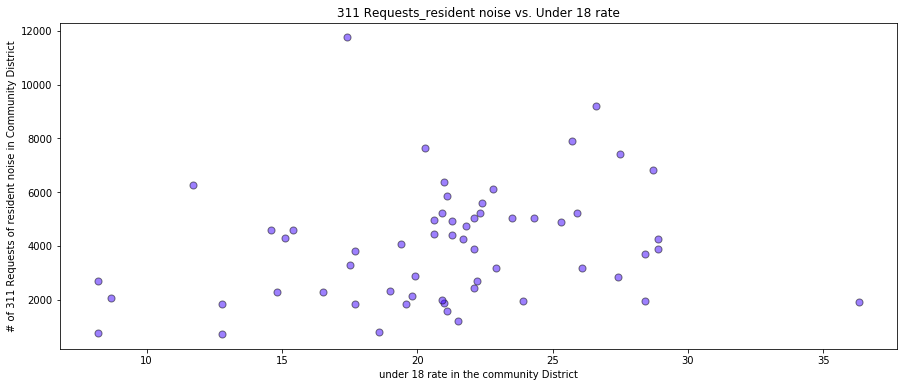

In [0]:
plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data['under18_rate']), # x
    np.array(merged_data.count_of_311_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

plt.title('311 Requests_resident noise vs. Under 18 rate')
plt.xlabel('under 18 rate in the community District')
plt.ylabel('# of 311 Requests of resident noise in Community District')

plt.show()

**Step 7**. Conduct an OLS linear regression using the indicator values vs. 311 complaint counts and interpret the results.

In [0]:
x = np.array(merged_data['under18_rate'])
y = np.array(merged_data.count_of_311_requests)

np.corrcoef(x, y)

array([[1.        , 0.22759753],
       [0.22759753, 1.        ]])

In [0]:
# y = dependent variable (# of 311 requests)
y = np.array(merged_data.count_of_311_requests)

# x = independent variable (population) with a constant added
x = np.array(merged_data['under18_rate'])
x = sm.add_constant(x)

print(x)

model = sm.OLS(y, x).fit()

# Print out the statistics

print(model.summary())

[[ 1.  28.4]
 [ 1.  21.1]
 [ 1.  12.8]
 [ 1.  14.6]
 [ 1.  23.5]
 [ 1.  28.4]
 [ 1.  17.7]
 [ 1.  12.8]
 [ 1.  16.5]
 [ 1.  21.1]
 [ 1.  28.9]
 [ 1.  25.7]
 [ 1.  11.7]
 [ 1.  22.1]
 [ 1.  21.5]
 [ 1.  27.5]
 [ 1.  21. ]
 [ 1.   8.2]
 [ 1.  22.2]
 [ 1.  28.7]
 [ 1.  25.9]
 [ 1.   8.2]
 [ 1.  21.3]
 [ 1.  28.9]
 [ 1.  21. ]
 [ 1.   8.7]
 [ 1.  17.7]
 [ 1.  26.6]
 [ 1.  23.9]
 [ 1.  15.1]
 [ 1.  17.5]
 [ 1.  21.3]
 [ 1.  19.4]
 [ 1.  14.8]
 [ 1.  20.6]
 [ 1.  24.3]
 [ 1.  21.7]
 [ 1.  15.4]
 [ 1.  22.1]
 [ 1.  19. ]
 [ 1.  19.6]
 [ 1.  20.3]
 [ 1.  20.9]
 [ 1.  22.3]
 [ 1.  20.9]
 [ 1.  20.6]
 [ 1.  18.6]
 [ 1.  22.4]
 [ 1.  36.3]
 [ 1.  17.4]
 [ 1.  22.8]
 [ 1.  19.8]
 [ 1.  19.9]
 [ 1.  25.3]
 [ 1.  27.4]
 [ 1.  22.1]
 [ 1.  26.1]
 [ 1.  21.8]
 [ 1.  22.9]]
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.052
Model:                            OLS   Adj. R-squared:                  0

**Step 8**. Use the linear regression results to add a line of best fit to your scatterplot

In [0]:
p = model.params # intercept and coefficient
print('parameters:', p)

r2 = model.rsquared
print('R2:', r2)

parameters: [2079.45401074   91.55052896]
R2: 0.05180063486595843


In [0]:
label = 'y = ' + str(round(p[1],2)) + 'x + ' + str(round(p[0],2)) + '; R2 = ' + str(round(r2,3))
print(label)

y = 91.55x + 2079.45; R2 = 0.052


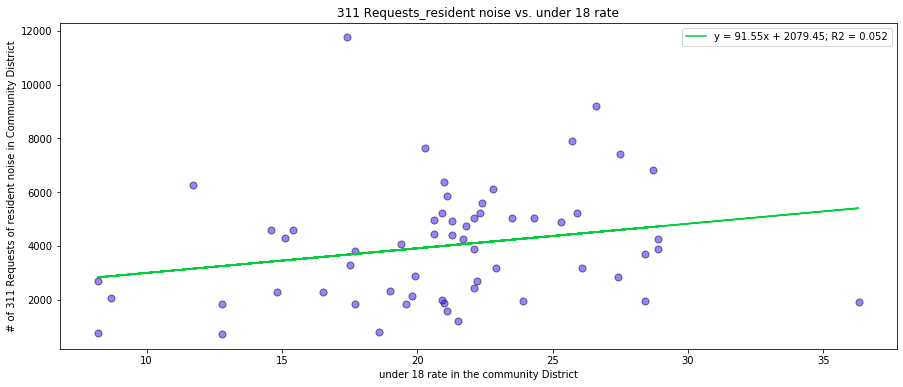

In [0]:
x_dummy = np.array(merged_data['under18_rate'])

plt.figure(figsize=(15, 6))

plt.scatter(
    np.array(merged_data['under18_rate']), # x
    np.array(merged_data.count_of_311_requests), # y
    s=50, # size of marker
    c='#3d03fc', # color hex color picker: https://www.google.com/search?q=color+picker
    edgecolors='black', # outline color of the marker
    alpha=0.5) # transparency. 0 is 100% transparent. 1 is 100% opaque

# line of best fit, with y intercept
plt.plot(
    x_dummy, 
    p[0] + p[1] * x_dummy,
    c='#00d138', # lighter green
    label=label)

plt.title('311 Requests_resident noise vs. under 18 rate')
plt.xlabel('under 18 rate in the community District')
plt.ylabel('# of 311 Requests of resident noise in Community District')
plt.legend()

plt.show()

**Step 9**. Write a paragraph explaining the results of your analysis? Have you found a meaningful relationship?


> As showing above in the graph, we can see there is a clear collation between number of resident noise complaints and rate of under 18 in the community district. With an upper sloppe of the graph, we can tell that more children the community have, there will be more complaint about noise in the resident area. This might because children are getting out of school so early, and they are only allow to play in the residential area for security reasons.




